In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

%matplotlib inline
sns.set_style('darkgrid')

In [25]:
print(mpl.style.available)
mpl.style.use('seaborn-v0_8-darkgrid')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [26]:
# plt.rcParams['figure.dpi'] = 600
# plt.rcParams['figure.figsize'] = [12,8]

# Matplotlib Basics

Text(0.5, 1.0, 'Trig Functions')

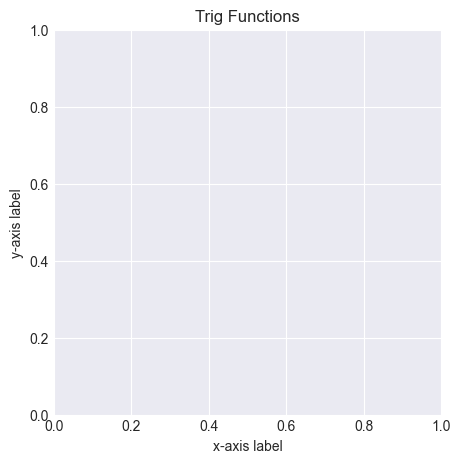

In [27]:
# The simplest way to create a figure and axes is to use `subplots` and `pyplot`
fig,ax = plt.subplots(figsize=(5,5))  # figsize = (width,height)
ax.set_xlabel('x-axis label')
ax.set_ylabel('y-axis label')
ax.set_title('Trig Functions')

In [28]:
x_pts = np.linspace(-2 * np.pi, 2 * np.pi, 200)
y_pts = np.sin(x_pts)
ax.plot(x_pts, y_pts, label='sin')
ax.legend()
# ax.set_title("sin wave")

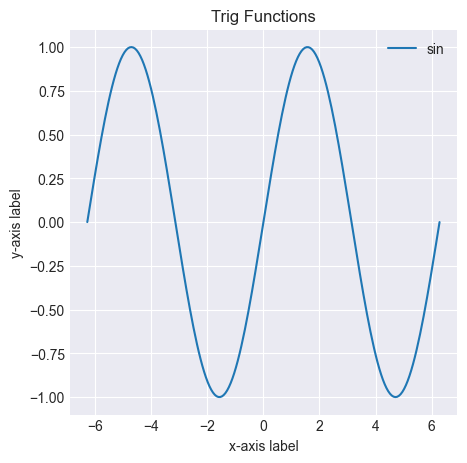

In [29]:
fig

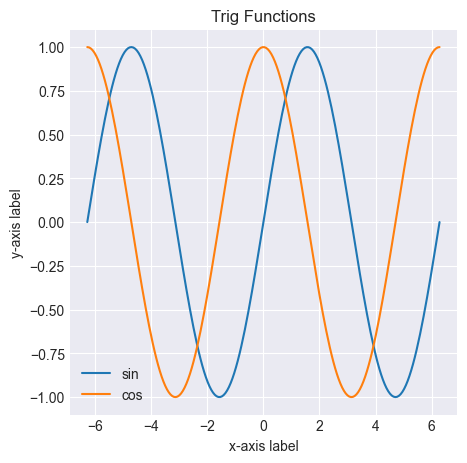

In [30]:
ax.plot(x_pts, np.cos(x_pts), label='cos')
ax.legend()
fig

<class 'numpy.ndarray'>
[<Axes: > <Axes: >]


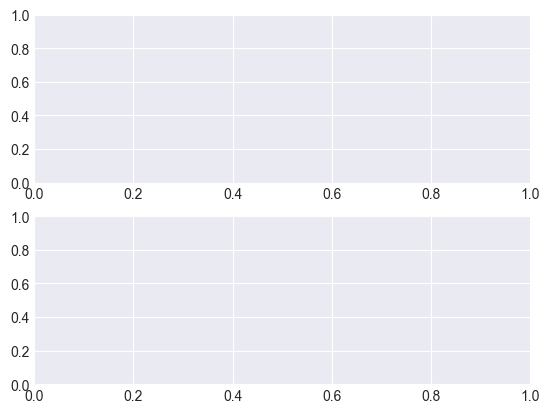

In [31]:
fig,axs = plt.subplots(nrows=2,ncols=1)
# fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1)
print(type(axs))
print(axs)

[<Axes: > <Axes: >]


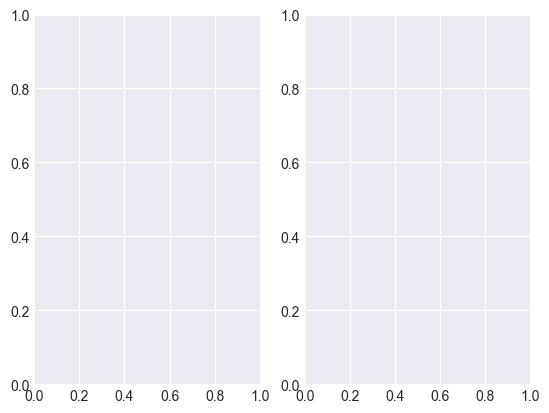

In [32]:
fig,axs = plt.subplots(nrows=1,ncols=2)
print(axs)

[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


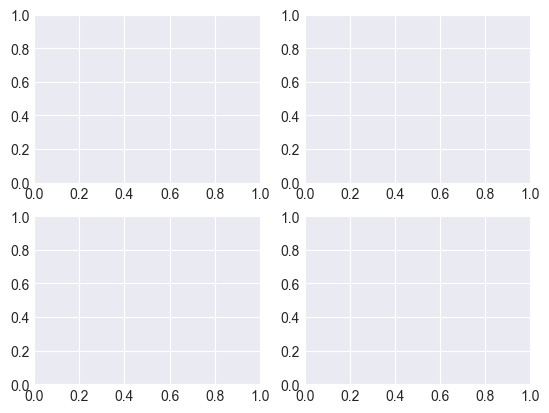

In [33]:
fig,axs = plt.subplots(nrows=2,ncols=2)
print(axs)

Text(0.5, 1.0, 'Trig Functions')

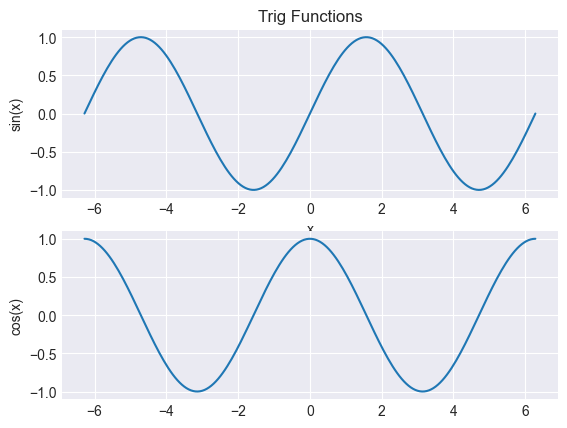

In [34]:
fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1)
x_axis = np.linspace(-2*np.pi, 2*np.pi, 200)

ax1.plot(x_axis, np.sin(x_axis),label='sin')
ax2.plot(x_axis, np.cos(x_axis),label='cos')

ax1.set_xlabel('x')
ax1.set_ylabel('sin(x)')
ax2.set_ylabel('cos(x)')
ax1.set_title('Trig Functions')

In [35]:
df = pd.read_csv('./assets/DEXUSEU.csv')

def tweak_dexuseu(df_:pd.DataFrame):
    cols:list = ['DATE','DEXUSEU']
    return(
        df_.assign(
            DATE = lambda df_:pd.to_datetime(df_['DATE'],errors='coerce'),
            DEXUSEU = lambda df_:pd.to_numeric(df_['DEXUSEU'],errors='coerce').interpolate(method='nearest').round(2)
        )
    )

dexuseu_df =  df.pipe(tweak_dexuseu)
dexuseu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     1306 non-null   datetime64[ns]
 1   DEXUSEU  1306 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 20.5 KB


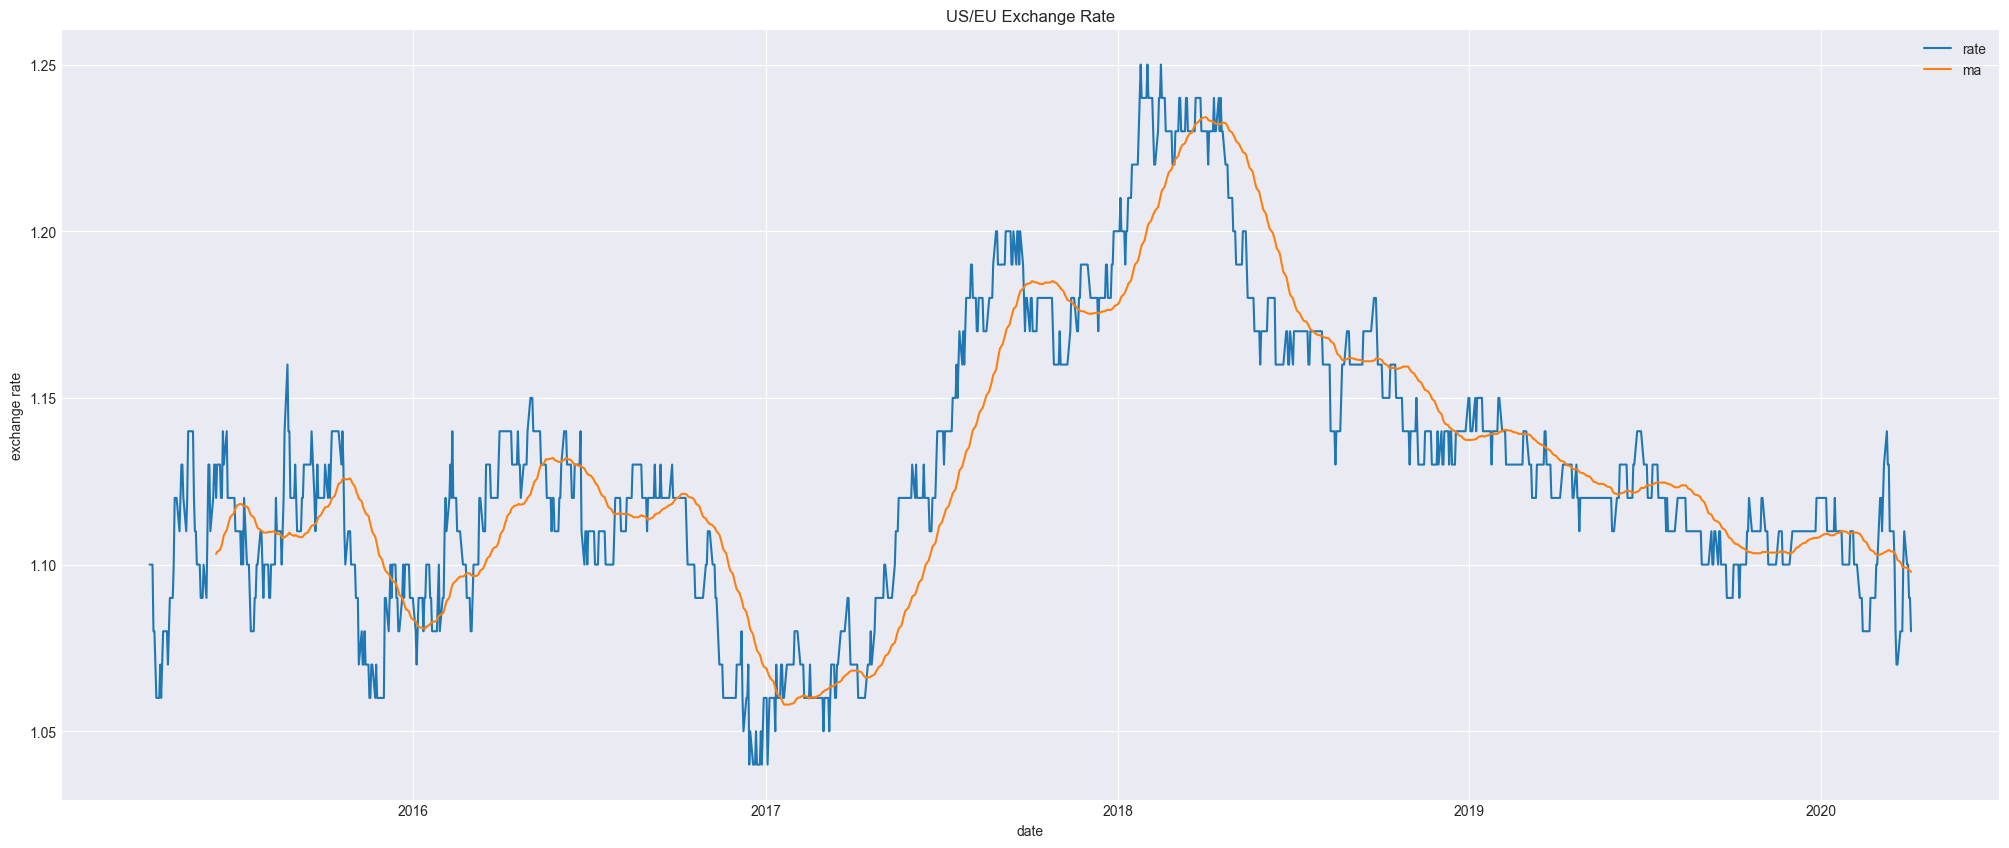

In [36]:
fig,ax = plt.subplots( figsize=(25, 10))

ax.plot(
    dexuseu_df['DATE'].values, 
    dexuseu_df['DEXUSEU'].values,
    label='rate'
)
ax.plot(
    dexuseu_df['DATE'].values,
    dexuseu_df['DEXUSEU'].rolling(window=50).mean(),
    label='ma'
)

ax.set_xlabel('date')
ax.set_ylabel('exchange rate')
ax.set_title('US/EU Exchange Rate')
ax.legend()

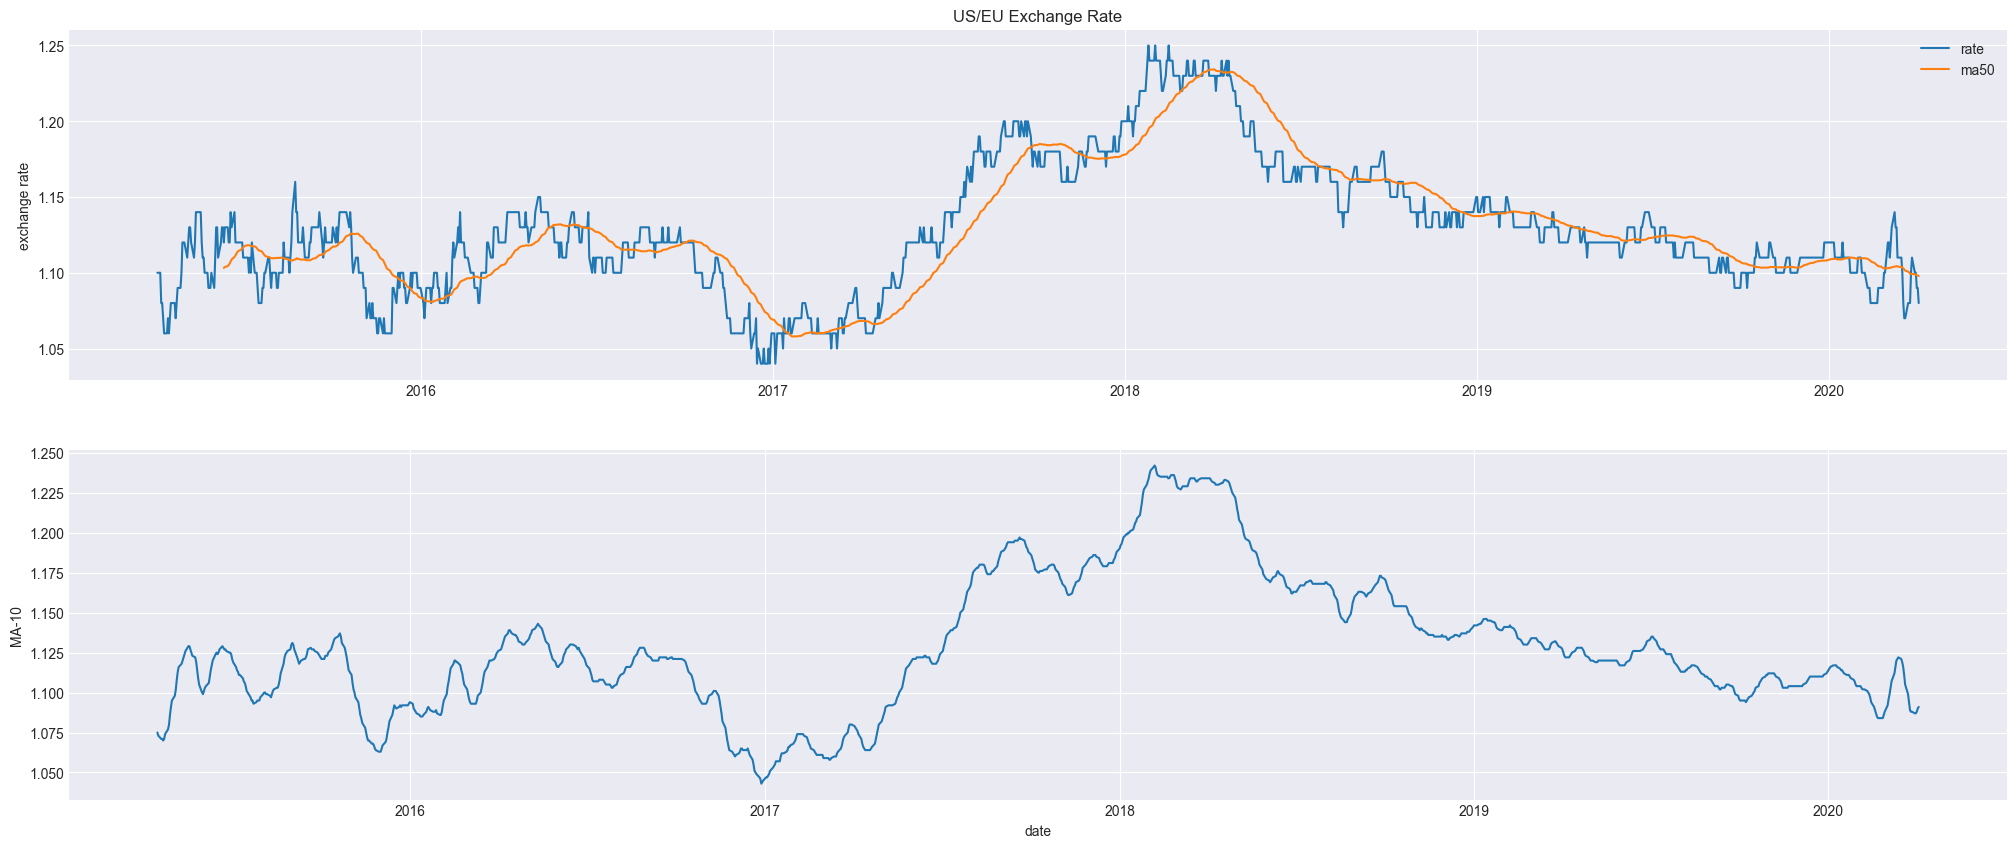

In [37]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 10))
ax1.plot(
    dexuseu_df['DATE'].values,
    dexuseu_df['DEXUSEU'].values,
    label='rate',
)
ax1.plot(
    dexuseu_df['DATE'].values,
    dexuseu_df['DEXUSEU'].rolling(window=50).mean(),
    label='ma50'
)
ax2.plot(
    dexuseu_df['DATE'].values,
    dexuseu_df['DEXUSEU'].rolling(window=10).mean(),
    label='ma10'
)
ax2.set_xlabel('date')
ax1.set_ylabel('exchange rate')
ax2.set_ylabel('MA-10')
ax1.set_title('US/EU Exchange Rate')
ax1.legend()

Text(0, 0.5, 'population')

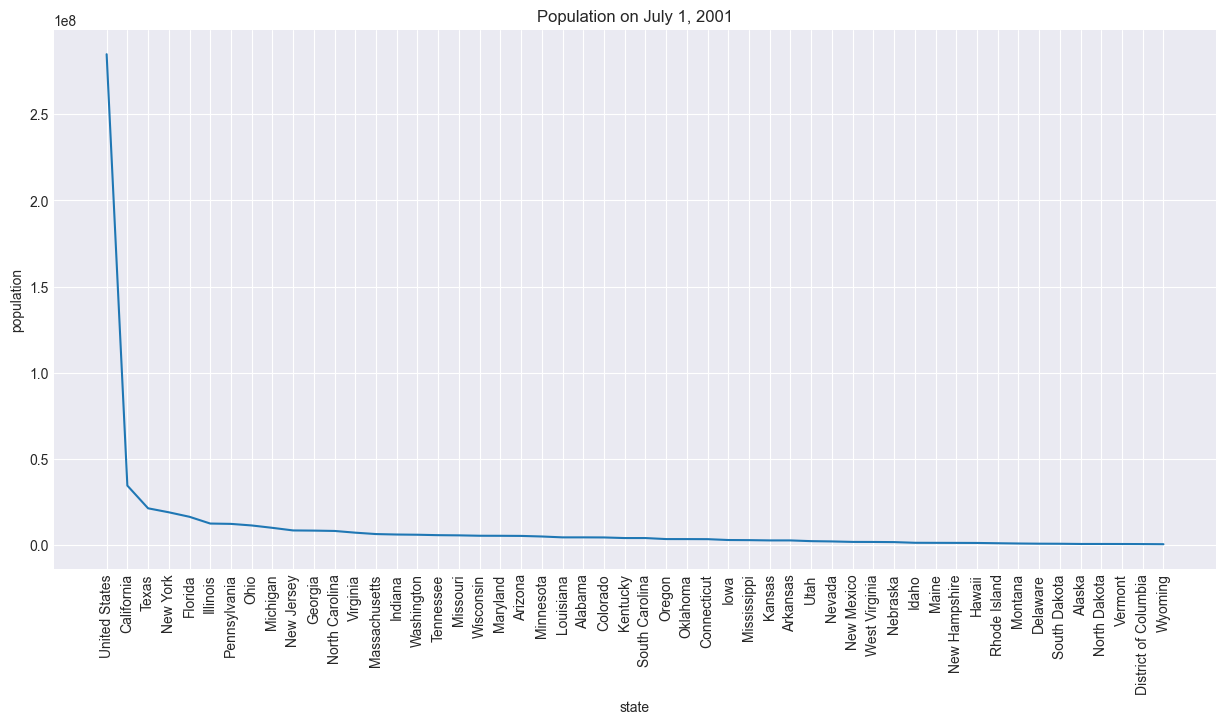

In [38]:
population = pd.read_csv('./assets/populations.csv')
population = population.sort_values(by='July 1, 2001 Estimate',ascending=False)

fig,ax = plt.subplots(figsize=(15,7))
ax.plot(
    population['Geographic Area'],
    population['July 1, 2001 Estimate'],
    label='Population',
)
plt.xticks(rotation=90)
ax.set_xlabel('state')
ax.set_title('Population on July 1, 2001')
ax.set_ylabel('population')

Text(0.5, 1.0, 'Population on July 1, 2001')

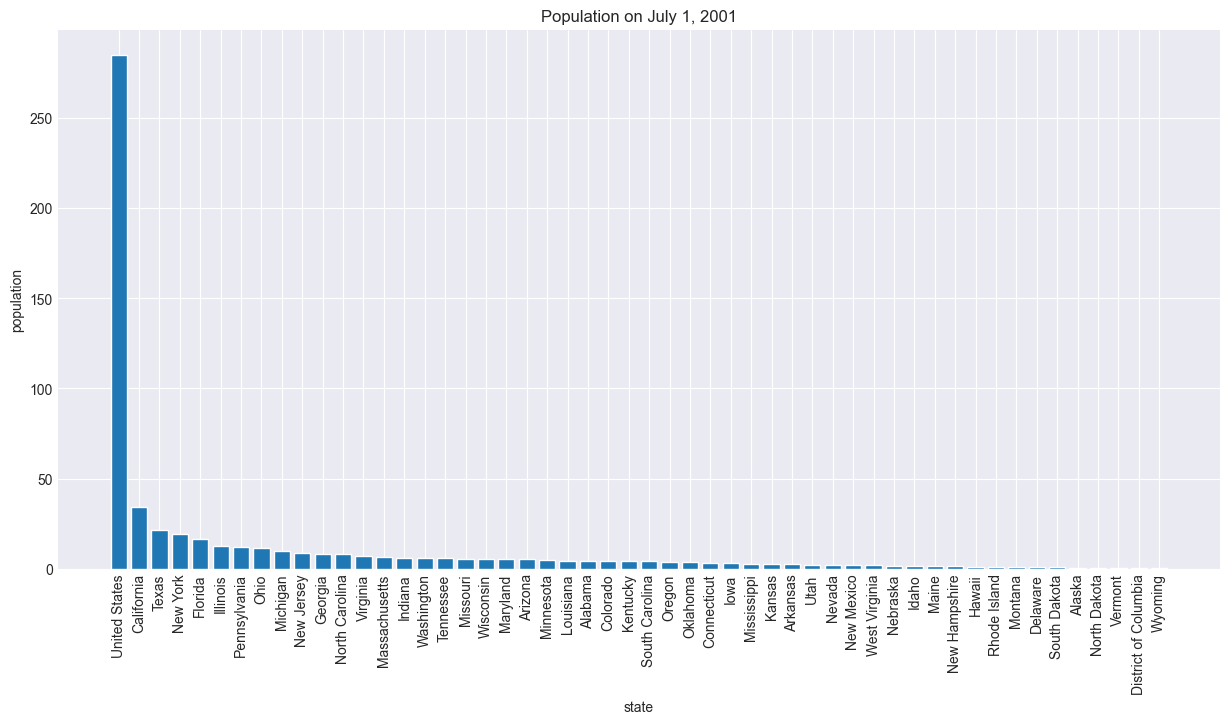

In [39]:
fig,ax = plt.subplots(figsize=(15,7))
ax.bar(
    population['Geographic Area'],
    (population['July 1, 2001 Estimate']/1_000_000),
    label='Population',
)
plt.xticks(rotation=90)
ax.set_xlabel('state')
ax.set_ylabel('population')
ax.set_title('Population on July 1, 2001')

Text(0.5, 1.0, 'line plot')

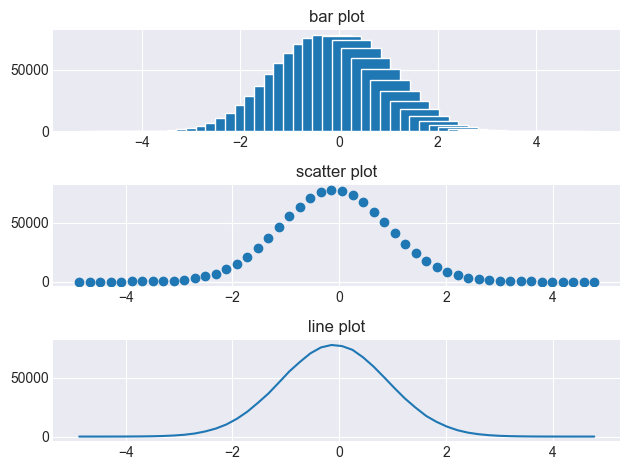

In [40]:
freq,bins = np.histogram(np.random.normal(0, 1, size=1_000_000),bins=50)

fig,(ax1,ax2,ax3) = plt.subplots(3,1,tight_layout=True)
ax1.bar(bins[:-1],freq)
ax1.set_title('bar plot')

ax2.scatter(bins[:-1],freq)
ax2.set_title('scatter plot')

ax3.plot(bins[:-1],freq)
ax3.set_title('line plot')

[-3.885347427011967, 0.0517414921035515, 3.9888304112190704]


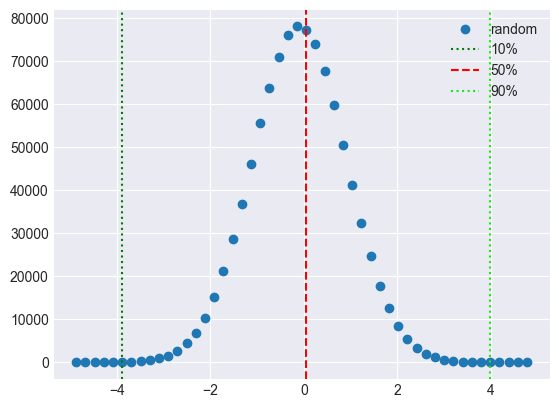

In [41]:
percentaile = [np.percentile(bins, p) for p in (10, 50, 90)] 
print(percentaile)

fig,ax = plt.subplots()
ax.scatter(
    bins[:-1],
    freq,
    label = 'random'
),
ax.axvline(percentaile[0],linestyle=':', color='green', label='10%')
ax.axvline(percentaile[1],linestyle='--', color='red', label='50%')
ax.axvline(percentaile[2],linestyle=':',color=mpl.colors.to_rgba((0.1, 0.9, 0.1)), label='90%')
ax.legend()

# Bar Chart

        Brand  Cars Listings
6  Volkswagen            875
0        Audi            419
4     Renault            438
5      Toyota            509
1         BMW            636


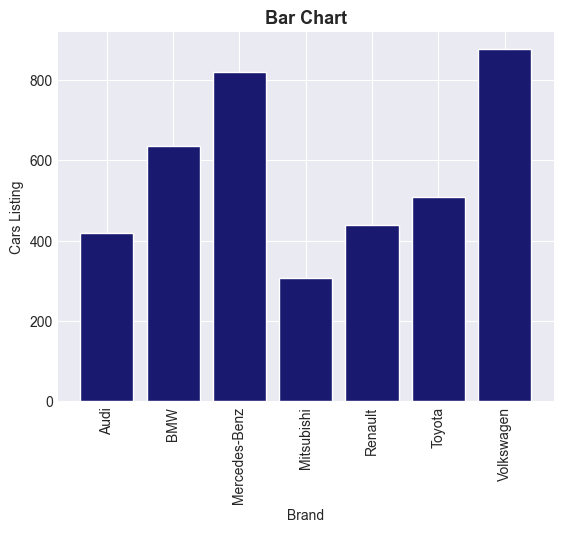

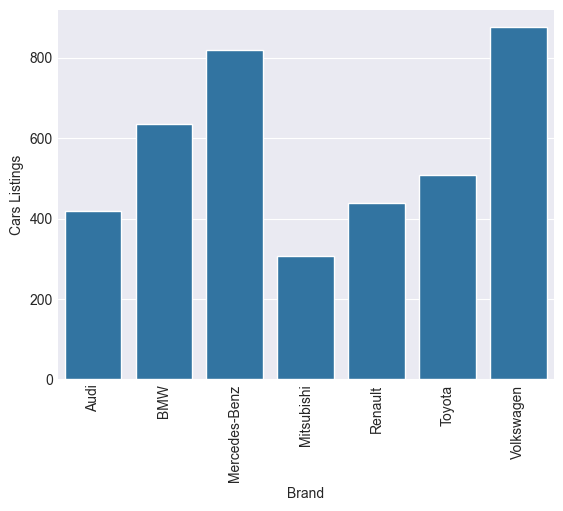

In [42]:
df = pd.read_csv('./assets/bar_chart_data.csv')
print(df.sample(5).to_string())

plt.bar(
    x=df.Brand,
    height=df['Cars Listings'],
    color="midnightblue" #r,g,b,w,y,m,c
)
plt.xlabel("Brand")
plt.xticks(rotation=90)
plt.ylabel("Cars Listing")
plt.title("Bar Chart",fontsize=13,fontweight="bold")
plt.show()


sns.barplot(
    data=df,
    x='Brand',
    y='Cars Listings',
    # hue =
)
plt.xticks(rotation=90)
plt.show()

# Pie chart

  Engine Fuel Type  Number of Cars
3           Petrol            1559
1              Gas             613
0           Diesel            2019


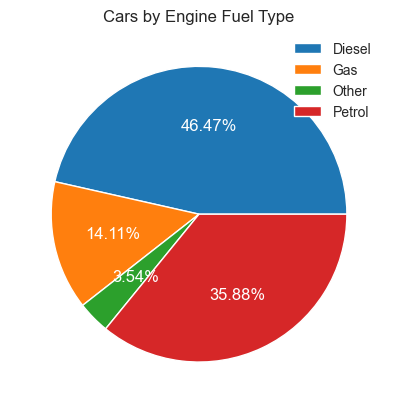

In [43]:
df = pd.read_csv("./assets/pie_chart_data.csv")
print(df.sample(3).to_string())

plt.pie(
    x=df['Number of Cars'],
    labels=df['Engine Fuel Type'].values,
    autopct="%.2f%%", # 2 decimal
    textprops = {
        "size":"large",
        "fontweight":"20",
        'rotation':'horizontal',
        'color':'w'
    }
)
plt.legend(loc="best");
plt.title("Cars by Engine Fuel Type")
plt.show()



# Stacked Area Chart

    Year   Gas  Petrol  Diesel  Other
27  2009  2179    5682   10191   1204
30  2012  1899    8763   27958   1736
24  2006  6439   12372   18024   1878


<Figure size 640x480 with 0 Axes>

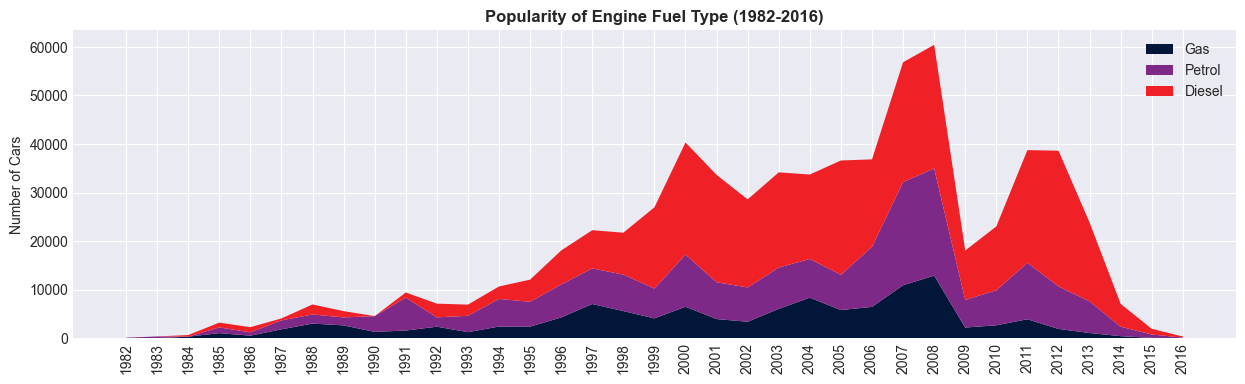

In [44]:
df = pd.read_csv("./assets/stacked_area_chart_data.csv")
print(df.sample(3).to_string())

# remove border
sns.despine(left=True)

plt.figure(figsize=(15,4))
labels = df.drop(['Year','Other'],axis=1).columns
colors = ['#011638','#7e2987','#ef2026']
plt.stackplot(df['Year'], # X-axis

    # stacking parameters
    df['Gas'], 
    df['Petrol'],
    df['Diesel'],
    colors=colors,
    edgecolor="none",
    labels=labels
)

plt.ylabel("Number of Cars",fontsize=10)
plt.title("Popularity of Engine Fuel Type (1982-2016)",weight="bold",fontsize=12)
plt.xticks(df['Year'],rotation=90)
plt.legend()
plt.show()

# Line Plot

        Date   GSPC500   FTSE100
0 2000-01-03  0.003264  0.000000
1 2000-01-04 -0.009549  0.000000
2 2000-01-05 -0.038345 -0.038137


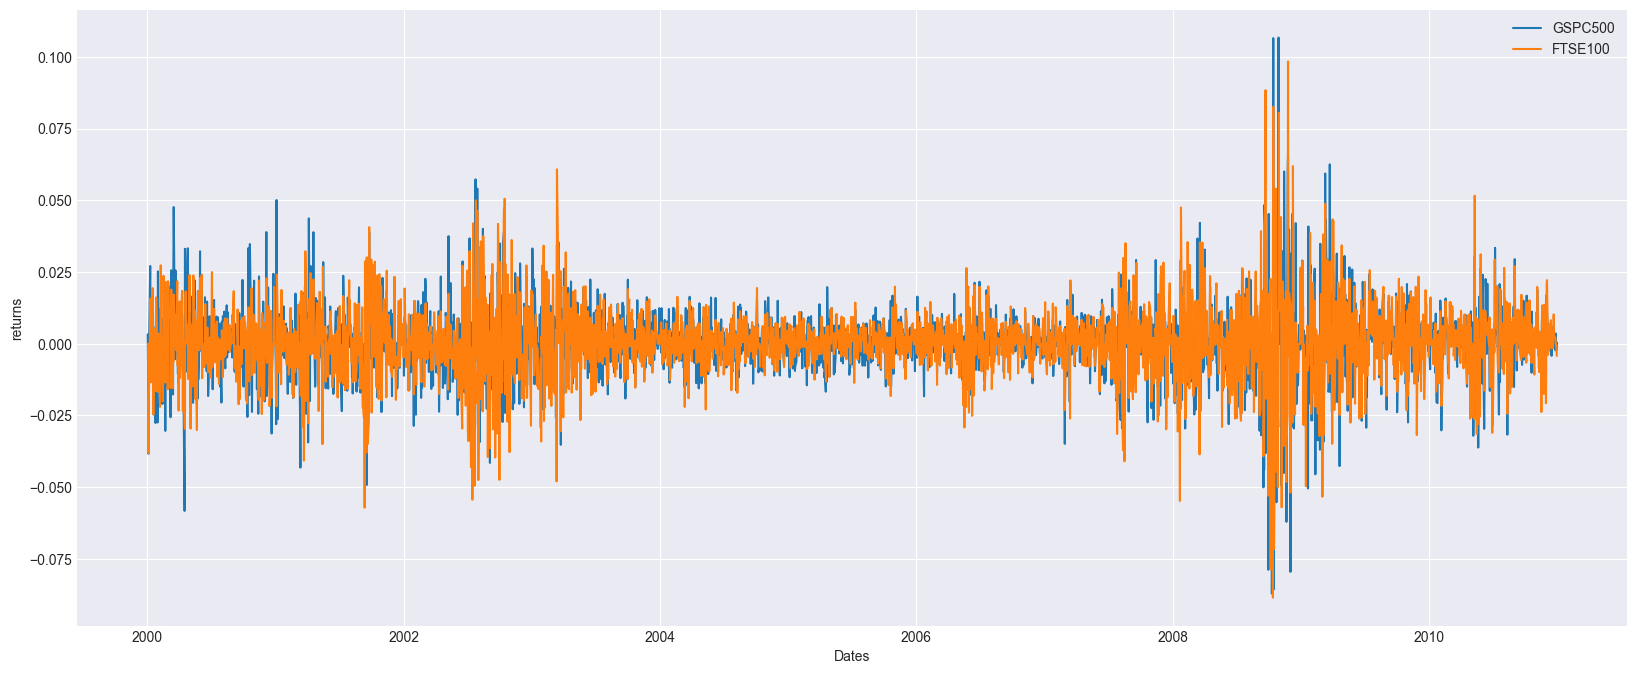

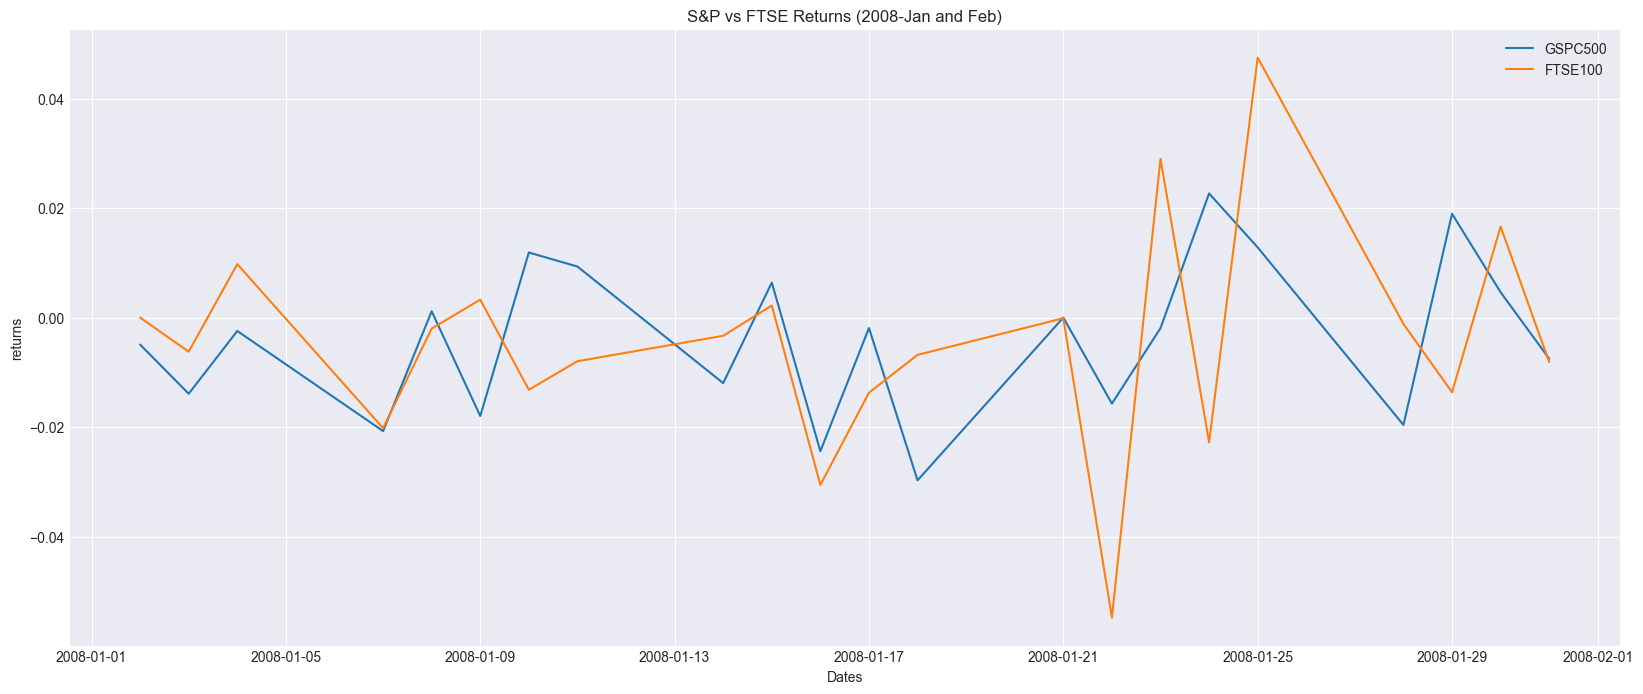

In [45]:
df = pd.read_csv("./assets/line_chart_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
print(df.head(3).to_string())

plt.figure(figsize=(20,8))
plt.plot(df['Date'],df['GSPC500'],label="GSPC500")
plt.plot(df['Date'],df['FTSE100'],label="FTSE100")
plt.legend()
plt.ylabel("returns"); plt.xlabel("Dates")
plt.show()



df_new  = df.loc[(
    (df.Date >'2008-01-01')
    &
    (df.Date<'2008-02-01')
)]

plt.figure(figsize=(20,8))
plt.plot(df_new['Date'],df_new['GSPC500'],label="GSPC500")
plt.plot(df_new['Date'],df_new['FTSE100'],label="FTSE100")
plt.legend()
plt.ylabel("returns"); plt.xlabel("Dates")
plt.title("S&P vs FTSE Returns (2008-Jan and Feb)")
plt.show()

# Histogram

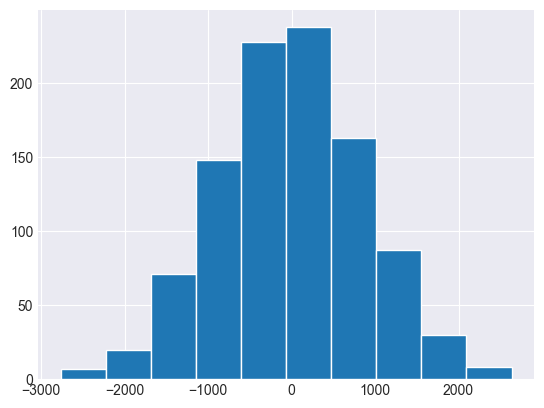

In [46]:
l = np.random.randn(1000)*912

plt.hist(l)
plt.show()   # Y-scale explode

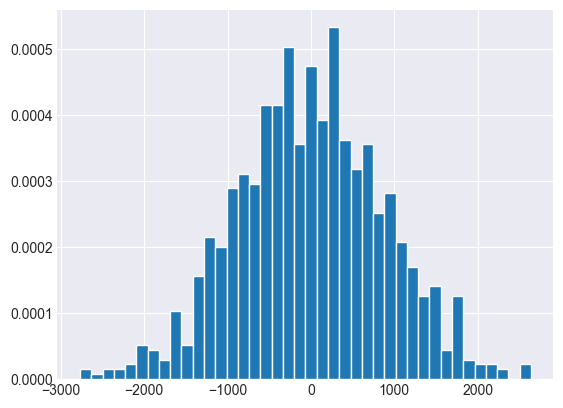

In [47]:
plt.hist(l,bins=40,density=True)   
plt.show()                          # Area under curve=1

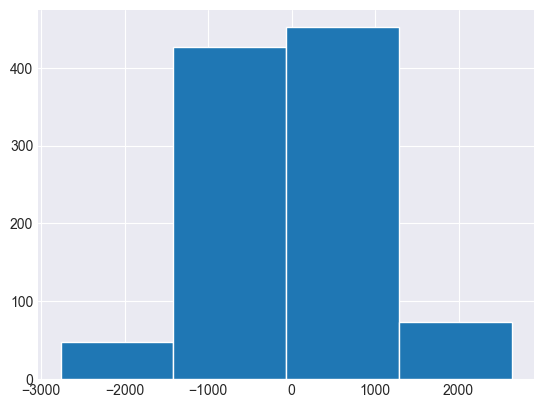

In [48]:
# Be aware of BINS
plt.hist(l,bins=4)   
plt.show()       

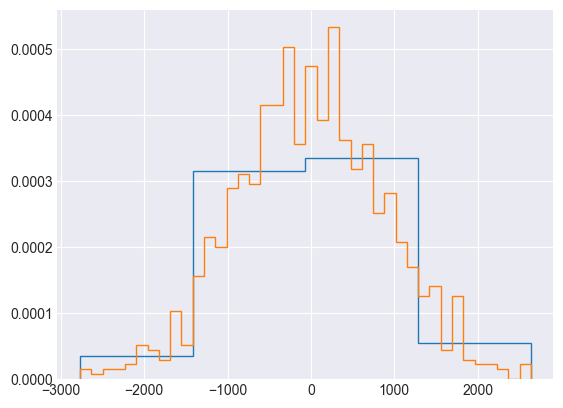

In [49]:
plt.hist(l,bins=4,histtype="step",density=True)   
plt.hist(l,bins=40,histtype="step",density=True)   
plt.show()

# Scatter Plot

      ID  Building Type  Year of sale  Month of sale Type of property  Property #  Area (ft.)      Price  Status
31  3034              3        2007.0            4.0        Apartment          34      781.07  256.82164   Sold 
30  2043              2        2007.0            4.0        Apartment          43     1110.32  355.07340   Sold 
97  2024              2        2005.0            6.0        Apartment          24     1604.75  456.91946   Sold 


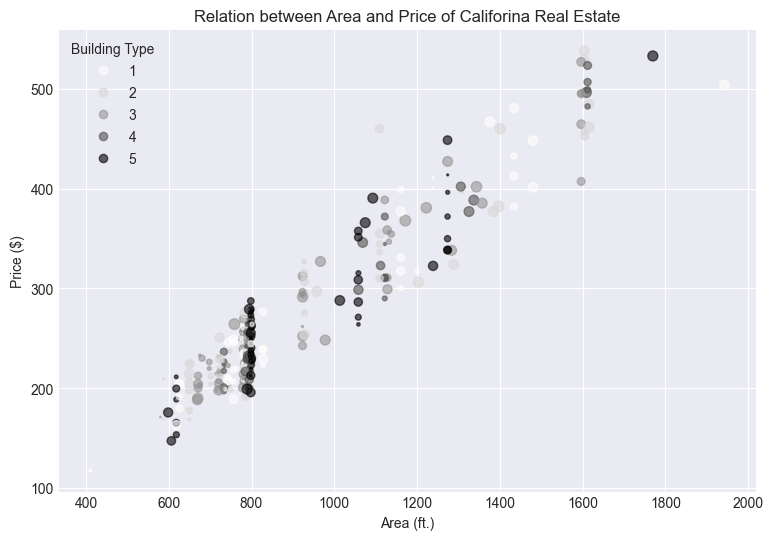

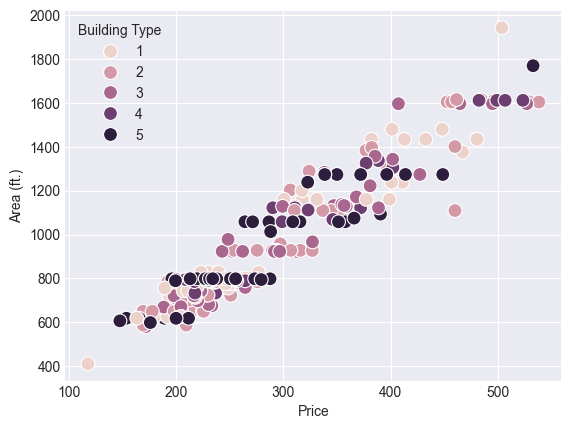

In [50]:
df = pd.read_csv('./assets/scatter_data.csv')
print(df.sample(3).to_string())

plt.figure(figsize=(9,6))
scatter = plt.scatter(
    x=df['Area (ft.)'],
    y=df['Price'],
    alpha=0.6,                  # alpha = transperency
    c =df['Building Type'], # color
    s = df['Property #']  # size
)
plt.legend(*scatter.legend_elements(),title="Building Type")
plt.title("Relation between Area and Price of Califorina Real Estate")
plt.xlabel("Area (ft.)")
plt.ylabel("Price ($)")
plt.show()


sns.scatterplot(
    x= df['Price'],
    y = df["Area (ft.)"],
    hue=df["Building Type"],
    s=100
)
plt.show()

# Box Plot

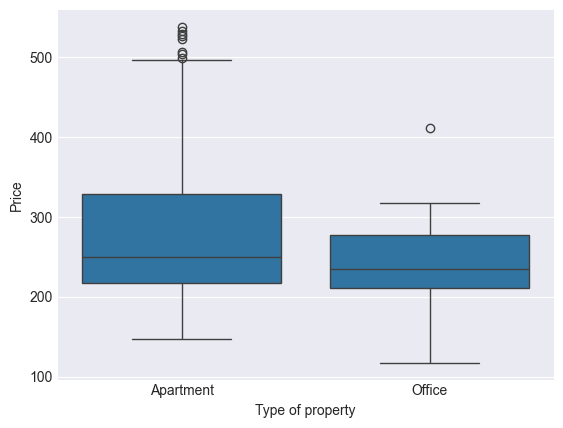

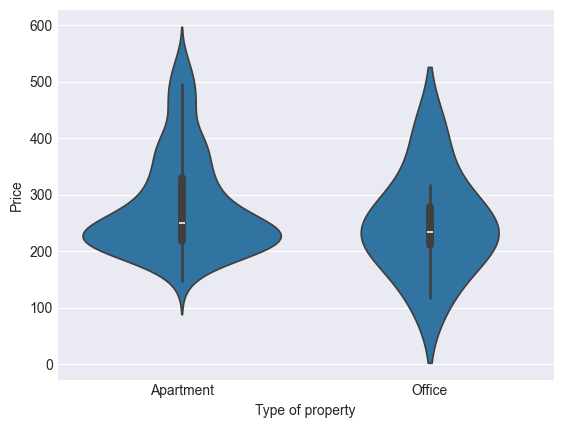

In [51]:
sns.boxplot(data=df,x="Type of property",y="Price")
plt.show()


sns.violinplot(data=df,x="Type of property",y="Price")
plt.show()

# Reg Plot

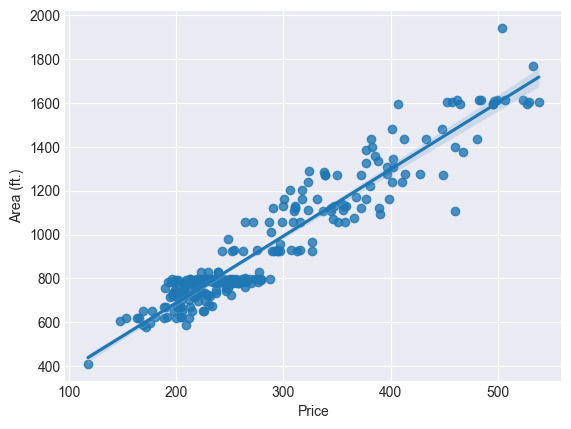

In [52]:
sns.regplot(data=df,x="Price",y='Area (ft.)');
plt.show()

# `note:` Positive correlation here

# Contour Plots

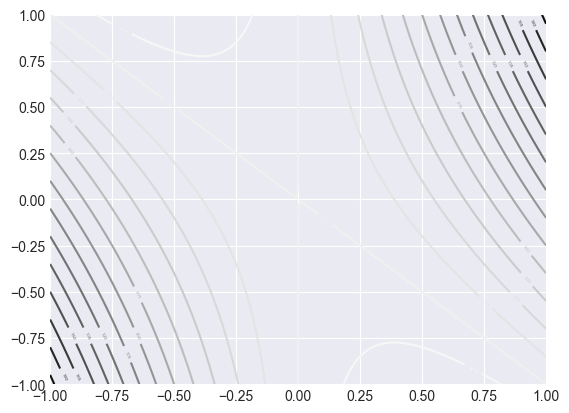

In [53]:
_ = np.linspace(-1,1,100)
x,y = np.meshgrid(_,_)
z = x**2+x*y

cs = plt.contour(x,y,z,levels=20);
plt.clabel(cs,fontsize=3)
plt.show()

# Spyder Chart

  group  var1  var2  var3  var4  var5
0     A  38.0    29     8     7    28
1     B   1.5    10    39    31    15
2     C  30.0     9    23    33    32
3     D   4.0    34    24    14    14
categories:['var1', 'var2', 'var3', 'var4', 'var5'] and N=5 and 
values=[38.0, 29, 8, 7, 28, 38.0]  and 
angles=[0.0, 1.2566370614359172, 2.5132741228718345, 3.7699111843077517, 5.026548245743669, 0.0]


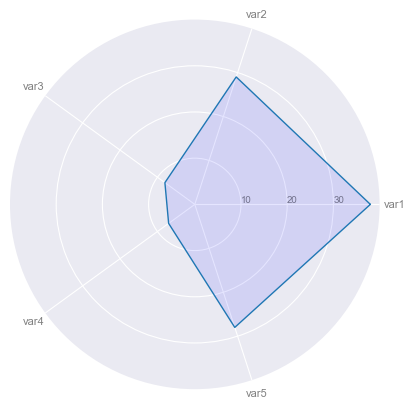

In [54]:
from math import pi
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})

print(df.to_string())

categories=list(df)[1:]
N = len(categories)
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]


print(f"categories:{categories} and N={N} and \nvalues={values}  and \nangles={angles}")

ax = plt.subplot(111, polar=True) 
plt.xticks(angles[:-1], categories, color='grey', size=8) 
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)  
plt.show()

# Plotly

In [55]:
import plotly 
from plotly import express as px  # (sort of seaborn)
from plotly import graph_objects as go # (sort of matplotlib)
from plotly.io import to_json

In [56]:
df = px.data.gapminder().query("year==2002")
print(df.sample(5).to_string())

        country continent  year  lifeExp         pop    gdpPercap iso_alpha  iso_num
1654    Vietnam      Asia  2002   73.017    80908147  1764.456677       VNM      704
310    Colombia  Americas  2002   71.682    41008227  5755.259962       COL      170
610   Guatemala  Americas  2002   68.978    11178650  4858.347495       GTM      320
706       India      Asia  2002   62.879  1034172547  1746.769454       IND      356
22      Albania    Europe  2002   75.651     3508512  4604.211737       ALB        8


In [57]:
px.strip(data_frame=df,x="lifeExp",hover_name="country",color="continent")

In [58]:
px.histogram(data_frame=df,x="lifeExp",hover_name='country',color='continent',marginal='rug')

In [59]:
px.histogram(data_frame=df,x="lifeExp",y='pop',hover_name='country',color='continent',marginal='rug',facet_col='continent')

In [60]:
fig1 = px.bar(data_frame=df,color="lifeExp",x='pop',hover_name='country',y='continent')
fig1.show()

In [61]:
px.sunburst(data_frame=df,color='lifeExp',values='pop',hover_name='country',path=['continent','country'],height=900)

In [62]:
px.treemap(data_frame=df,color='lifeExp',values='pop',hover_name='country',path=['continent','country'],height=900)

In [63]:
px.choropleth(data_frame=df,color='lifeExp',locations='iso_alpha',hover_name='country',height=600)

In [64]:
px.scatter(data_frame=df,y='lifeExp',x='gdpPercap',hover_name='country',height=600,color='continent',size='pop')

In [65]:
px.scatter(df,y="lifeExp",x="gdpPercap",hover_name="country",height=600,color="continent",size="pop",log_x=True,size_max=60)

In [66]:
df = px.data.wind()

fig = px.bar_polar(
    data_frame=df,
    r="frequency",
    theta="direction",
    height=600,
    color="strength",
    template="plotly_dark",
    color_discrete_sequence=px.colors.sequential.Plasma_r
)
fig.show()

In [67]:
df = px.data.iris()
fig = px.parallel_coordinates(
    data_frame=df,
    color="species_id",
    labels={
        "species_id":"Species",
        "sepal_width":"Sepal Width",
        "sepal_length":"Sepal Length",
        "petal_width":"Petal Width",
        "petal_length":"Petal Length"
    },
    color_continuous_scale=px.colors.diverging.Tealrose,
    color_continuous_midpoint=2
)
fig.show()

In [68]:
df = px.data.tips()

fig = px.parallel_categories(df,color="size",color_continuous_scale=px.colors.sequential.Tealgrn,height=500)
fig.show()

In [69]:
df = px.data.election()

fig = px.scatter_ternary(
    data_frame=df,
    a="Joly",
    b="Coderre",
    c="Bergeron",
    color="winner",
    size="total",
    hover_name="district",
    size_max=15,
    color_discrete_map={
        "Joly":"blue",
        "Bergeron":"green",
        "Coderre":'red'
    },
    height=600
)

fig.show()

In [70]:
fig = px.scatter_3d(
    data_frame=df,
    x="Joly",
    y="Coderre",
    z="Bergeron",
    color="winner",
    size="total",
    hover_name="district",
    symbol="result",
    size_max=15,
    color_discrete_map={
        "Joly":"blue",
        "Bergeron":"green",
        "Coderre":'red'
    },
    height=600
)
fig.show()

# Data Analysis is an ART - we should appreciate

credits: https://www.python-graph-gallery.com/